In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
C_m = 200.0  # Membrane capacitance
g_L = 10.0   # Leakage conductance
E_L = -70.0  # Leakage reversal potential
V_T = -50.0  # Threshold potential
Delta_T = 2.0  # Exponential rise characteristic parameter

V_reset = -65.0  # Reset potential
b = 60.0  # Increment of adaptation variable after each spike
a = 4.0   # Adaptation strength
tau_w = 144.0  # Adaptation time constant

T = 1000.0
dt = 0.1
time = np.arange(0, T + dt, dt)

I_ext = np.zeros_like(time)
I_ext[(time >= 100) & (time <= 300)] = 300.0

V = np.ones_like(time) * E_L  # Membrane potential
w = np.zeros_like(time)

P_L = np.zeros_like(time)  # Power due to leakage
P_W = np.zeros_like(time)  # Power due to adaptation

for t in range(1, len(time)):

    dV = (g_L * (E_L - V[t-1]) + g_L * Delta_T * np.exp((V[t-1] - V_T) / Delta_T) - w[t-1] + I_ext[t-1]) * (dt / C_m)
    V[t] = V[t-1] + dV
    # Calculate membrane potential change

    dw = (a * (V[t-1] - E_L) - w[t-1]) * (dt / tau_w)
    w[t] = w[t-1] + dw
    # Calculate adaptation variable change

    if V[t] >= -40.0:
        V[t-1] = 20.0
        V[t] = V_reset
        w[t] += b

    I_L = g_L * (V[t-1] - E_L)
    P_L[t] = V[t-1] * I_L * 1e-12
    P_W[t] = V[t-1] * w[t-1] * 1e-12
    # Calculate leakage power and adaptation power

Total_L = np.sum(P_L) * dt * 1e-13
Total_W = np.sum(P_W) * dt * 1e-13
# Calculate total energy

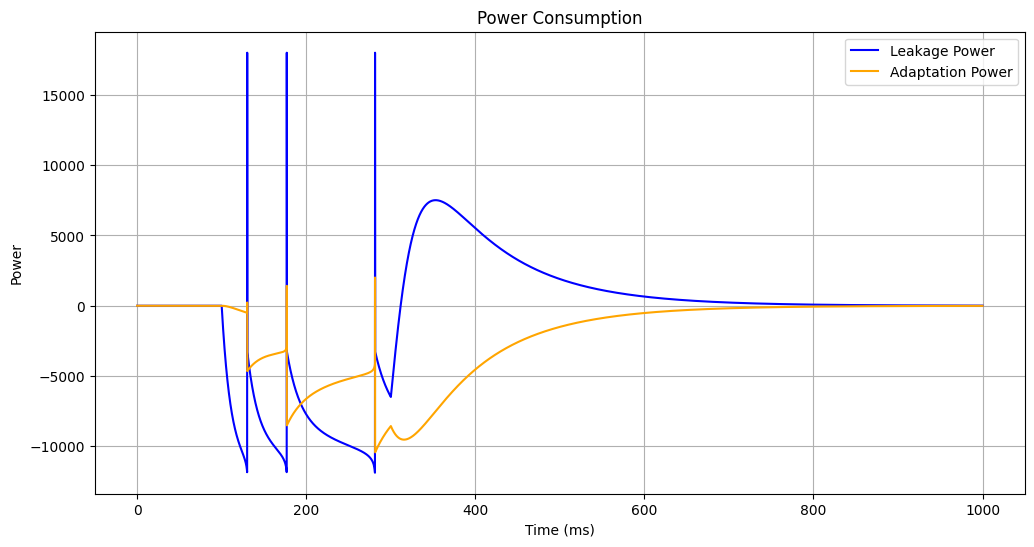

In [6]:
plt.figure(figsize=(12, 6))

plt.plot(time, P_L * 1e12, label='Leakage Power', color='blue')
plt.plot(time, P_W * 1e12, label='Adaptation Power', color='orange')
plt.title('Power Consumption')
plt.xlabel('Time (ms)')
plt.ylabel('Power')
plt.legend()
plt.grid()
plt.show()